## Question 1
### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

### 1.Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

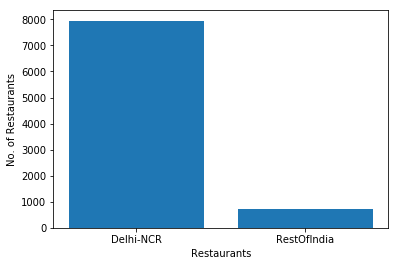

Restaurants in Delhi-NCR 7947
Restaurants in RestOfIndia 705


In [2]:
#Importing all relevant header files
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted dataframe
df=data.copy()

#Fixing Column Names with spaces 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India 
df=df[(df.country_code==1)]

#print(df.columns)

#Replacing Delhi and NCR cities name to Delhi-NCR 
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)

#Modifying Indian city name to Delhi-NCR and RestOfIndia
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#Calculating the count of number of occurences of Delhi-NCR and RestOfIndia (no. of restaurants in that city) 
series_city_count=df['city'].value_counts()

#Generating list of keys from series
key=series_city_count.keys().tolist()

#Generating list of values from series
value=series_city_count.tolist()

#Plotting the bar graph from list of city names as data of x axis and list of count of restaurants as data of y axis 
plt.bar(key,value)
#Labelling x axis
plt.xlabel("Restaurants")
#Labelling y axis
plt.ylabel("No. of Restaurants")
#Show plot
plt.show()

#Printing the generated count of number of restaurants of Delhi-NCR and RestOfIndia
for i in range(len(key)):
    print("Restaurants in",key[i],value[i])

### Conclusion - Restaurants in Delhi NCR is more than that in RestOfIndia
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Cities got filtered and modified among Delhi-NCR and RestOfIndia cities using apply() and update_city().
#### 6.Using value count in pandas library, the required count of restaurants in Delhi-NCR and RestOfIndia is calculated and stored in series_city_count.
#### 7.From the series_city_count, keys and its value is extracted and stored in list key and value.
#### 8.Bar graph is plotted using pyplot using list key and value.

### 2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [3]:
#Importing all relevant header files
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from requests.auth import HTTPBasicAuth

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted data 
df=data.copy()

#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Replacing Delhi and NCR cities name to Delhi-NCR 
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)

#Modifying Indian city name to Delhi-NCR and RestOfIndia
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#Creating dictionary city as key and value as list of cuisine by grouping the dataframe wrt city
df_grp=df.groupby('city')['cuisines'].apply(','.join).str.split(',')
dict_city_cuisine=dict(df_grp)

#Converting string of values to list with stripped elements and also Removing Duplicates in values of dict_city_cuisine
for i in dict_city_cuisine:
    lst=dict_city_cuisine[i]
    lst=[i.strip() for i in lst]
    dict_city_cuisine[i]=list(set(lst))

#Creating lists of values of dict_city_cuisine
rest_l=dict_city_cuisine['RestOfIndia']
ncr_l=dict_city_cuisine['Delhi-NCR']

#Filtering and printing the data according to Cuisines which are not present in Delhi-NCR but are present in RestOfIndia
cuisine_list_csv=[]
print('Cuisines which are not present in Delhi-NCR but are present in RestOfIndia')
for i in rest_l:
    if i not in ncr_l:
        print(i)
        cuisine_list_csv.append(i.strip())
print()  

#Part2 Verifying whether these cuisines actually don't exist
Complete_Cuisine_List=[]

#Extracting city_id via API Call
para1={"q":'Delhi NCR'}
header={"user-key":"01089ffa97fbc4375e4cf7abf3a5b54e"}
a=requests.get('https://developers.zomato.com/api/v2.1/cities',params=para1,headers=header)
#Converting JSON file to python
pyd=json.loads(a.text)
#Extracting city_id
city_id=pyd['location_suggestions'][0]['id']

#Using ciy_id to retrieve the complete list of cuisines served in Delhi NCR via API Call
para2={"city_id":city_id}
a=requests.get('https://developers.zomato.com/api/v2.1/cuisines',params=para2,headers=header)
#Converting JSON file to python
pyd=json.loads(a.text)
#Extracting list of cuisines
for i in pyd['cuisines']:
    Complete_Cuisine_List.append(i['cuisine']['cuisine_name'].strip())

#Comparing using generated list Complete_Cuisine_List and cuisine_list_csv
print('Verifying whether above dishes are actually not present via API call')
for i in cuisine_list_csv:
    if i in Complete_Cuisine_List:
        print(i+" is present")
    else:
        print(i+" is not present")
print()

Cuisines which are not present in Delhi-NCR but are present in RestOfIndia
Malwani
BBQ
Cajun
German

Verifying whether above dishes are actually not present via API call
Malwani is not present
BBQ is present
Cajun is not present
German is present



### Conclusion - Based on the above inferences, we can conclude that this result from csv is incorrect due to incomplete dataset
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Cities got filtered and modified among Delhi-NCR and RestOfIndia cities using apply() and update_city().
#### 6.Creating a dictionary dict_city_cuisine of city as key and value as cuisine using group by from pandas libary,then Converting string of values to list and also removing duplicates in values of dict_city_cuisine.
#### 7.Creating list of rest_l and ncr_l  that stores uniques names of cuisines served in  RestOfIndia and Delhi-NCR respectively.
#### 8.Filtering list of rest_l and ncr_l  according to Cuisines which are not present in Delhi-NCR but are present in RestOfIndia, stored in cuisine_list_csv and printing the same.
#### 9.To verify the cuisine actually does not exist, Using requests library we make a request to zomato api to retrieve city_id of Delhi-NCR by coverting json to python using json library.
#### 10.Further using city_id  to generate the list of cuisines served in Delhi-NCR and storing it in Complete_Cuisine_List. 
#### 11. To check whether the cuisines present in Delhi NCR or not, comparing the list of cuisine list generated by csv file and api call.

### 3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Delhi-NCR Top 10 Cuisines Vs No. of Restaurants
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


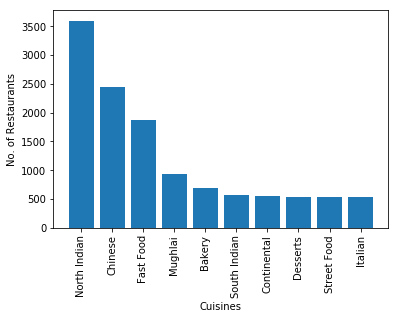

RestOfIndia Top 10 Cuisines Vs No. of Restaurants
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


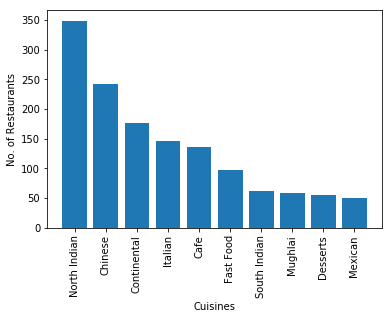

In [4]:
#Importing all relevant header files
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Replacing Delhi and NCR cities name to Delhi-NCR 
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)

#Modifying Indian city name to Delhi-NCR and RestOfIndia
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#Creating dictionary city as key and value as list of cuisine by grouping the dataframe wrt city
df_grp=df.groupby('city')['cuisines'].apply(','.join).str.split(',')
dict_city_cuisine=dict(df_grp)
        
#Converting string of values to list with stripped elements
for i in dict_city_cuisine:
    lst=dict_city_cuisine[i]
    dict_city_cuisine[i]=[i.strip() for i in lst]

#temp_dict stores values and keys of Delhi-NCR and RestOfIndia (to be used in ques 1.4)
temp_dict={}
for i in dict_city_cuisine:
    #Creating a dataFrame df_temp to count values of cuisines present in Delhi-NCR and RestOfIndia
    df_temp=pd.DataFrame(dict_city_cuisine[i])
    #Calculating the count of number of occurences of cuisines(no. of restaurants) of i city
    series_cuisines_count=df_temp[0].value_counts()
    #Generating list of keys from series
    keys=series_cuisines_count.keys().tolist()
    #Generating list of values from series
    values=series_cuisines_count.tolist()
    #Printing top 10 cuisines of i city
    print(i+' Top 10 Cuisines Vs No. of Restaurants')
    
    #Initializing key and value for temp_dict
    temp_dict[i+'top_10_x']=[]
    temp_dict[i+'top_10_y']=[]
    
    #Printing and storing top 10 cuisines and its count to temp_dict
    for j in range(10):
        print(keys[j],end=' ')
        temp_dict[i+'top_10_x'].append(keys[j])
        print(values[j])
        temp_dict[i+'top_10_y'].append(values[j])
        
    #Plotting the bar graph from list of names of cuisines as data of x axis and list of no. of occurances of cuisines(no.of restuarants in which cuisine is served) as data of y axis 
    plt.bar(temp_dict[i+'top_10_x'],temp_dict[i+'top_10_y'])
    #Labelling x axis
    plt.xlabel("Cuisines")
    #Labelling y axis
    plt.ylabel("No. of Restaurants")
    #Changing angle of text written on x axis
    plt.xticks(rotation=90)
    #Show plot
    plt.show()

### Conclusion - Top 10 cuisines served by rest of india nd Delhi-NCR have 8 cuisnes in common where north indian and chinese served maximum in both these set of cities.
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Cities got filtered and modified among Delhi-NCR and RestOfIndia cities using apply() and update_city().
#### 6.Creating a dictionary dict_city_cuisine of city as key and value as cuisine using group by from pandas libary,then Converting string of values to list with stripped elements.
#### 7.Now using dict_city_cuisine creating a dictionary temp_dict stores keys and its values(lists of cuisines(x data) and lists of its frequency of cuisines that is no. of restaurants(y data)) of Delhi-NCR and RestOfIndia 
#### 8.Extracting top 10 cuisines for each set of cities
#### 9.Printing and plotting the bar graph of No.of Restaurants vs cuisines.

### 4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Cuisines present in Delhi-NCR but not present in RestOfIndia
Sushi
Oriya
Pakistani
Iranian
Raw Meats
Assamese
Bihari
Kashmiri
Deli
Drinks Only
Afghani
South American
Persian
Nepalese
Moroccan
Naga
Cuisine Varies
Sri Lankan
Turkish
Belgian

Cuisines present in RestOfIndia but not present in Delhi-NCR
Malwani
BBQ
Cajun
German

Also from Que1-Part3 above, common cuisines among both region from the set of top 10 cuisines of both region along with the no. of Restaurants are-
Delhi-NCR Region


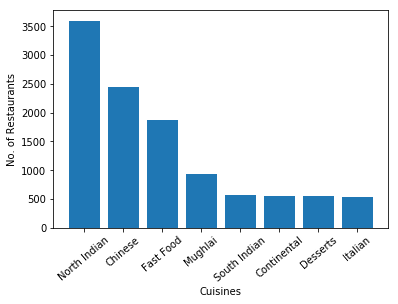


RestOfIndia Region


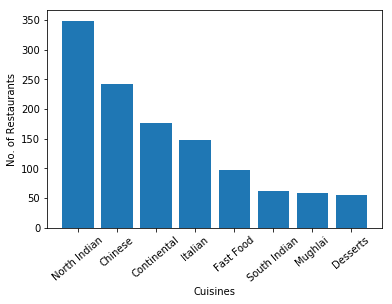

In [5]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted data 
df=data.copy()

#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Replacing Delhi and NCR cities name to Delhi-NCR 
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)

#Modifying Indian city name to Delhi-NCR and RestOfIndia
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#Creating dictionary city as key and value as list of cuisine by grouping the dataframe wrt city
df_grp=df.groupby('city')['cuisines'].apply(','.join).str.split(',')
dict_city_cuisine=dict(df_grp)

#Converting string of values to list with stripped elements and also Removing Duplicates in values of dict_city_cuisine
for i in dict_city_cuisine:
    lst=dict_city_cuisine[i]
    lst=[i.strip() for i in lst]
    dict_city_cuisine[i]=list(set(lst))

#Creating lists of values of dict_city_cuisine
ncr_cuisine_list=dict_city_cuisine['Delhi-NCR']
non_ncr_cuisine_list=dict_city_cuisine['RestOfIndia']

#Filtering the data according to Cuisines which are not present in RestOfIndia but are present in Delhi-NCR
print('Cuisines present in Delhi-NCR but not present in RestOfIndia')
for i in ncr_cuisine_list:
    if i not in non_ncr_cuisine_list:
        print(i)
print()

#Filtering the data according to Cuisines which are not present in Delhi-NCR but are present in RestOfIndia
print('Cuisines present in RestOfIndia but not present in Delhi-NCR')
for i in non_ncr_cuisine_list:
    if i not in ncr_cuisine_list:
        print(i)
print()

print('Also from Que1-Part3 above, common cuisines among both region from the set of top 10 cuisines of both region along with the no. of Restaurants are-')

#Creating lists of keys from dict_city_cuisine
key=list(dict_city_cuisine.keys())
for i in range(len(key)):
    #Extracting values from temp_dict
    top_10_x=temp_dict[key[i]+'top_10_x']
    top_10_y=temp_dict[key[i]+'top_10_y']
    #if key['Delhi-NCR'] for top 10 x then neg top 10 x will be key['RestOfIndia'] and visa versa
    neg_top_10_x=temp_dict[key[(i+1)%2]+'top_10_x']
    #Creating two list x1 as data for x axis and y1 as data for y axis
    x1=[]#name of cuisine
    y1=[]#count of restaurant serving that cuisine
    #Filtering Common cuisines serverd in Delhi-NCR region among top 10 cuisines
    for j in range(len(top_10_x)):
        if top_10_x[j] in neg_top_10_x:
            x1.append(top_10_x[j])
            y1.append(top_10_y[j])
    print(key[i]+' Region')
    #Plotting the bar graph from list of names of cuisines as data of x axis and list of no. of occurances of cuisines(no.of restuarants in which cuisine is served) as data of y axis 
    plt.bar(x1,y1)
    #Changing angle of text written on x axis
    plt.xticks(rotation=40)
    #Labelling y axis 
    plt.xlabel("Cuisines")
    #Labelling y axis
    plt.ylabel("No. of Restaurants")
    #Show plot
    plt.show()
    print()


### Conclusion - Cuisines present in restOf India and not Delhi NCR are much less than Cuisines present in Delhi NCR and not in restOfIndia.Also,Common cuisines served by rest of india nd Delhi-NCR are 8 cuisnes where north indian and chinese served maximum in both these set of cities among top 10 cuisines served in both the set of cities.
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in variable data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names of df  are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Cities got filtered and modified among Delhi-NCR and RestOfIndia cities using apply() and update_city().
#### 6.Creating a dictionary dict_city_cuisine of city as key and value as cuisine using group by from pandas libary,then Converting string of values to list and also removing duplicates in values of dict_city_cuisine.
#### 7.Creating list of non_ncr_cuisine_list and ncr_cuisine_list that stores uniques names of cuisines served in RestOfIndia and Delhi-NCR respectively.
#### 8.Filtering  list of non_ncr_cuisine_list and ncr_cuisine_list according to Cuisines which are not present in Delhi-NCR but are present in RestOfIndia and printing the same.
#### 9.Also, filtering them according to Cuisines which are not present in RestOfIndia but are present in Delhi-NCR and printing the same.
#### 10.Using dictionary temp_dict from ques 3 to gererate common cuisines served by Delhi NCR and RestOfIndia.
#### 11.Printing and plotting the bar graph of No.of Restaurants vs cuisines.

## Question 2
### User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant. 

### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#### i.Number of Votes given Restaurant

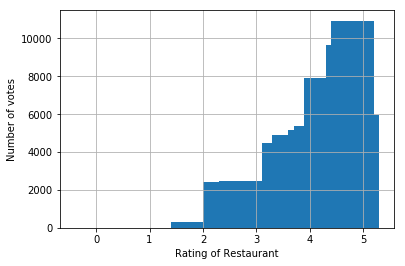

In [6]:
#Importing all relevant header files
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted data 
df=data.copy()

#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating x and y list for plotting
x=[]
y=[]
x=list(df['aggregate_rating'])
y=list(df['votes'])
#Plotting the bar graph from list of aggregate rating as data of x axis and list of no. of votes as data of y axis 
plt.bar(x,y)
#Plot grid lines
plt.grid()
#Labelling x axis
plt.xlabel("Rating of Restaurant")
#Labelling y axis
plt.ylabel("Number of votes")
#Show plot
plt.show()

### Conclusion- As we can see the rating getting increased with votes, we can conclude that both entities are directly proportional
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in variable data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names of df are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Now creating list of x and y of aggregate rating and votes respectively extracted from df.
#### 6.Plotting bar graph from x and y list with x axis as rating of restaurants and y axis as no. of votes.

### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#### ii.Restaurant serving more number of cuisines.

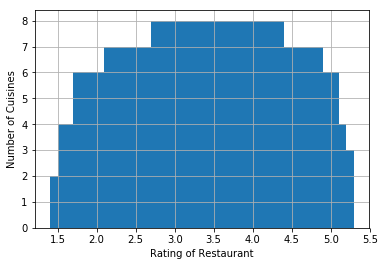

In [7]:
#Importing all relevant header files
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted data 
df=data.copy()

#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Calculating count of cuisines in a list
def count_cuisines(lst):
    return len(lst.split(","))

#Creating x and y list for plotting with x containig list of aggregate rating and y containing list of count of cusines
df['count_cuisine']=df['cuisines'].apply(count_cuisines)
df_temp=df[df['aggregate_rating']!=0]
x=list(df_temp['aggregate_rating'])
y=list(df_temp['count_cuisine'])

#Plotting the bar graph from list of aggregate rating as data of x axis and list of no. of cuisines as data of y axis 
plt.bar(x,y)
#plot grid lines
plt.grid()
#Lablling x axis
plt.xlabel("Rating of Restaurant")
#Lablling y axis
plt.ylabel("Number of Cuisines")
#Show plot
plt.show()


### Conclusion-As we can see that highest rated restaurants have less number of cuisines in comparison to resturants having more cuisines, we can conclude that rating is somewhat inversely proportional here with number of cuisines
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in variable data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names of df are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Now creating list of x and y of aggregate rating and no. of cuisines respectively.(No. of cuisines are calculated by finding length of cuisines after splitting and operation done row by row using count_cuisines())
#### 6.Plotting bar graph from x and y list with x axis as rating of restaurants and y axis as no. of cuisines.

### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#### iii.Average Cost of Restaurant

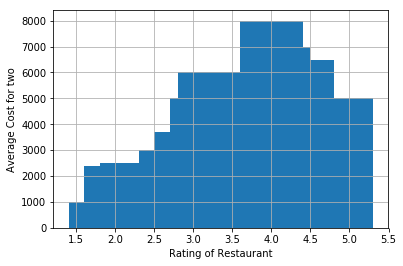

In [8]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating x and y list for plotting with x as list of aggregate rating and y as list of average_cost_for_two
df_temp=df[df['aggregate_rating']!=0]
x=list(df_temp['aggregate_rating'])
y=list(df_temp['average_cost_for_two'])

#Plotting the bar graph from list of aggregate rating as data of x axis and list of average cost as data of y axis 
plt.bar(x,y)
#Plot grid lines
plt.grid()
#Labelling x axis
plt.xlabel("Rating of Restaurant")
#Labelling y axis
plt.ylabel("Average Cost for two")
#Show plot
plt.show()

### Conclusion- Highest rated restaurants have less average cost in comparison to resturants having more average cost.
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in variable data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names of df are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Now creating list of x and y of aggregate rating and average cost for two respectively.
#### 6.Plotting bar graph from x and y list with x axis as rating of restaurants and y axis as average cost for two.

### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
#### iv.Restaurant serving some specific cuisines.

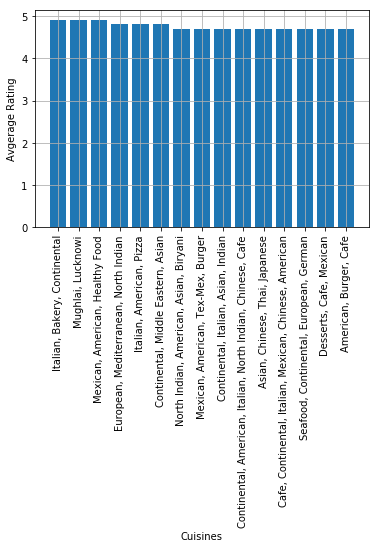


Italian, Bakery, Continental :  4.9
Mughlai, Lucknowi :  4.9
Mexican, American, Healthy Food :  4.9
European, Mediterranean, North Indian :  4.8
Italian, American, Pizza :  4.8
Continental, Middle Eastern, Asian :  4.8
North Indian, American, Asian, Biryani :  4.7
Mexican, American, Tex-Mex, Burger :  4.7
Continental, Italian, Asian, Indian :  4.7
Continental, American, Italian, North Indian, Chinese, Cafe :  4.7
Asian, Chinese, Thai, Japanese :  4.7
Cafe, Continental, Italian, Mexican, Chinese, American :  4.7
Seafood, Continental, European, German :  4.7
Desserts, Cafe, Mexican :  4.7
American, Burger, Cafe :  4.7


In [9]:
#Importing all relevant header files
import pandas as pd
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Grouping cuisines and finding the mean 
df_grp=df.groupby('cuisines',as_index=False).mean()
#Creating a dataframe from df_grp containing sorted data according to aggregate_rating in descending order
df_temp=df_grp.sort_values('aggregate_rating',ascending=False)

#Finding Top 15 Cuisines with maximum average rating of restaurants serving them
#Creating x1 and y1 list for plotting with x1 containing list of cuisines and y1 contaning list of aggregate rating
x1=list(df_temp['cuisines'])[:15]
y1=list(df_temp['aggregate_rating'])[:15]

#Plotting the bar graph from list of aggregate rating as data of y axis and list of specific cuisines as data of x axis 
plt.bar(x1,y1)
#Labelling x axis
plt.xlabel("Cuisines")
#Labelling y axis
plt.ylabel("Avgerage Rating")
#Plot grid lines
plt.grid()
#Changing angle of text written on x axis
plt.xticks(rotation=90)
#Show plot
plt.show()
print()
for i in range(len(x1)):
    print(x1[i],': ',y1[i])

### Conclusion-We can infer that serving above dishes leads to highest rating for restaurants
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in variable data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names of df are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Grouping cuisines and finding the mean in df and stored in df_grp
#### 6.Followed by creating a dataframe df_temp from df_grp containing sorted data according to aggregate_rating in descending order.
#### 7.Creating x1 and y1 list from df_temp for plotting with x1 containing list of cuisines and y1 containing list of aggregate rating(average rating of particular cuisine) of top 15 ratings.
#### 8.Plotting bar graph from x1 and y1 list and printing the same.

### 2.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

Top 10 localities with weighted rating in India
Hotel Clarks Amer, Malviya Nagar  :  4.90
Aminabad  :  4.90
Friends Colony  :  4.89
Powai  :  4.84
Kirlampudi Layout  :  4.82
Deccan Gymkhana  :  4.80
Express Avenue Mall,  Royapettah  :  4.80
Banjara Hills  :  4.72
Sector 5, Salt Lake  :  4.71
Riverside Mall, Gomti Nagar  :  4.70


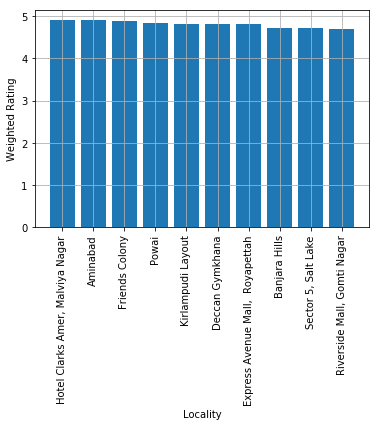

In [10]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted data 
df=data.copy()

#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating a list of unique localities
locality=list(set(df['locality']))

#Dict Locality vs Ratings of restaurant
dict_rating_locality={}
for i in locality:
    df_temp=df[df['locality']==i]
    rate=list(df_temp['aggregate_rating'])
    votes=list(df_temp['votes'])
    votes_rating=0
    total_votes=0
    for j in range(len(votes)):
        votes_rating+=votes[j]*rate[j]
    total_votes=sum(votes)
    if(total_votes!=0):
        weighted_rating=votes_rating/total_votes
    else:
        weighted_rating=0
    dict_rating_locality[i]=dict_rating_locality.get(i,0)+weighted_rating

#Creating x and y list for plotting
x=[]
y=[]
print('Top 10 localities with weighted rating in India')
#Sorting the dictionary in reverse order and fetching 10 records
for key, value in sorted(dict_rating_locality.items(), key=lambda item: item[1],reverse=True)[:10]:
    #printing List of top 10 localities and its weighted rating
    print(key," : ",format(value,'.2f'))
    #Creating List of top 10 localities
    x.append(key)
    #Creating List of weighted ratings of top 10 localities
    y.append(value)
#Plotting the bar graph from list of locality as data of x axis and list of weighted rating as data of y axis
plt.bar(x,y)
#Plot grid lines
plt.grid()
#Labelling x axis
plt.xlabel("Locality")
#Labelling y axis
plt.ylabel("Weighted Rating")
#Changing angle of text written on x axis
plt.xticks(rotation=90)
#Show plot
plt.show()

### Conclusion-Above extracted data shows top 10 localities with max weighted ratings
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in variable data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names of df are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Creating a list locality of Unique localities 
#### 6.Using list locality creating a dictionary dict_rating_locality of localities vs weighted ratings.
#### 7.Sorting the dictionary in reverse order and fetching top 10 records.
#### 8.Creating  x and y list for plotting with x containing list of localities and y contaning list of weighted rating
#### 9.Plotting bar graph from x and y list and printing the same.


## Question 3
### Visualization
### 1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

Top 15 restaurants in India with respect to number of outlets
Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 29
Giani 29
Baskin Robbins 28
Barbeque Nation 25
Dunkin' Donuts 22
Barista 22
Giani's 22
Costa Coffee 20
Pind Balluchi 20


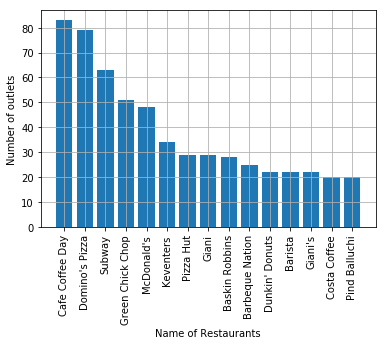

In [11]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Calculating the count of number of occurences of a restaurant(no. of restaurant's outlet) 
series_restaurant_count=df['restaurant_name'].value_counts()

#Generating list of keys from series
keys=series_restaurant_count.keys().tolist()[:15]

#Generating list of values from series
values=series_restaurant_count.tolist()[:15]


print('Top 15 restaurants in India with respect to number of outlets')
for i in range(15):
    print(keys[i],values[i])
#Plotting the bar graph from list of restaurants as data of x axis and list of no. of their outlets as data of y axis
plt.bar(keys,values)
#Labelling x axis
plt.xlabel("Name of Restaurants")
#Labelling y axis
plt.ylabel("Number of outlets")
#Plot grid lines
plt.grid()
#Changing angle of text on x axis
plt.xticks(rotation=90)
#Show plot
plt.show()


### Conclusion-Above extracted data shows Top 15 restaurants in India with respect to number of outlets
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Calculating the count of number of occurences of a restaurant name(no. of restaurant's outlet)  using value count and store it in series_restaurant_count .
#### 6.Fetching keys and values from series_restaurant_count of top 15 restaurants with maximum outlets.
#### 7.Plotting with x axis containing list of restaurant name and y axis contaning list of its count that is no. of outlets. 
#### 8.Plotting bar graph from keys and values list and printing the same.

### 2.Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

Aggregate rating of restuarants in India without considering unrated restaurants


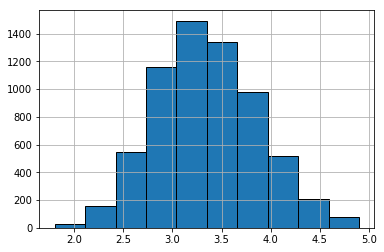

In [12]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

print('Aggregate rating of restuarants in India without considering unrated restaurants')
#Creating list x for plotting
df_temp=df[df['aggregate_rating']!=0]
x=list(df_temp['aggregate_rating'])
#Plotting histogram for showing frequency of aggregate ratings
plt.hist(x,edgecolor='black')
#Plot grid lines
plt.grid()
#Show plot
plt.show()

### Conclusion-Above extracted data shows Aggregate rating of restauarants in India without considering unrated restaurants.Here, ratings between 3 and 3.5 is maximum while there are v. few restaurants having rating between 4.5 and 5.
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Creating list x for plotting containing list of aggregate rating.
#### 6.Plotting histogram graph from list x for showing frequency of aggregate ratings

### 3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Top 10 Restaurants in India with maximum number of votes


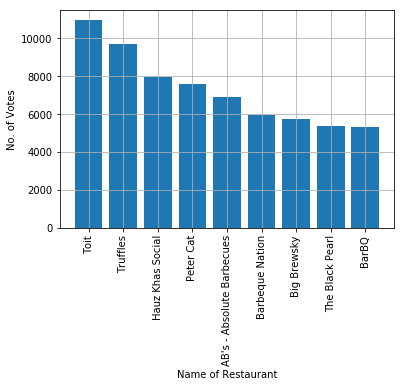

51705 Toit 10934
51040 Truffles 9667
308322 Hauz Khas Social 7931
20404 Peter Cat 7574
56618 AB's - Absolute Barbecues 6907
20842 Barbeque Nation 5966
58882 Big Brewsky 5705
94286 AB's - Absolute Barbecues 5434
54162 The Black Pearl 5385
20870 BarBQ 5288


In [13]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Groupig dataframe wrt restaurant id and applying sum function
df_grp=df.groupby('restaurant_id',as_index=False).sum()
#df_temp is sorted according votes generated from df_grp in descending order
df_temp=df_grp.sort_values('votes',ascending=False)


#fetching 10 records
#Creating x and y lists for plotting
x=list(df_temp['restaurant_id'])[:10]
y=list(df_temp['votes'])[:10]
print('Top 10 Restaurants in India with maximum number of votes')
#Creating a list of restaurant name
z=[]
for j in x:
    df_resname=df[df['restaurant_id']==j]
    z.append(list(df_resname['restaurant_name'])[0])
#Plotting the bar graph from list of restaurants as data of x axis and list of no. of their outlets as data of y axis
plt.bar(z,y)
#Changing angle of text on x axis
plt.xticks(rotation=90)
#Plot grd lines
plt.grid()
#Labelling x axis
plt.xlabel("Name of Restaurant")
#Labelling y axis
plt.ylabel("No. of Votes")
#Show plot
plt.show()
#Printing res_id,res_name,votes
for i in range(len(z)):
    print(x[i],z[i],y[i])

### Conclusion-Above extracted data shows  top 10 restaurants in the data with the highest number of votes
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Grouping dataframe wrt restaurant id and applying sum function to it and storing it in df_grp.
#### 6.Sorting df_grp accoridng to votes in descending order and storing it in df_temp.
#### 7.Creating list x and y by fetching top 10 records from df_temp dataframe.
#### 8.Extracting names of restaurant with the help of restaurant id and storing it in list z.
#### 9.Plotting bar graph from z and y list and printing res_id,res_name,votes.

### 4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

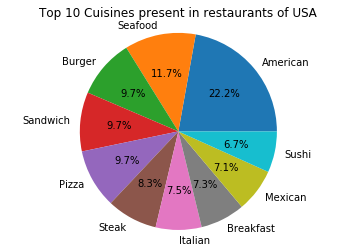

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


In [14]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")

#Making a copy of the extracted data 
df=data.copy()

#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code as USA
df=df[(df.country_code==216)]

#Extracting cuisines column from dataframe
#Fill nan with None
df.cuisines.fillna('None',inplace=True)

#Creating List of cuisines
#Creating dictionary country as key and value as list of cuisine by grouping the dataframe wrt country
df_temp=df[df['cuisines']!='None']
df_grp=df_temp.groupby('country_code')['cuisines'].apply(','.join).str.split(',')
dict_country_cuisine=dict(df_grp)
cuisines=dict_country_cuisine[216]
cuisines=[i.strip() for i in cuisines]

#Creating data frame for USA Cuisines
df_cuisines=pd.DataFrame(cuisines)

#Calculating the count of number of occurences of a cuisine served
series_cuisines_count_usa=df_cuisines[0].value_counts()
#Generating list of keys from series
keys=series_cuisines_count_usa.keys().tolist()
#Generating list of values from series
values=series_cuisines_count_usa.tolist()
#Creating list of labels and sizes for plotting
labels=keys[:10]
sizes=values[:10]
#Plotting pie chart with sizes as count of cuisines served and labels as cuisine name
plt.pie(sizes,labels=labels,autopct="%.1f%%")
#Writing title 
plt.title("Top 10 Cuisines present in restaurants of USA")
#Plotting pie chart with circle
plt.axis("equal")
#show plot
plt.show()
#Printing name of cuisine and its count of occurences
for i in range(len(labels)):
    print(labels[i],sizes[i])


### Conclusion-Above extracted data shows  top 10 cuisines present in restaurants in the USA
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 216 that is of USA.
#### 5.Replacing nan values with None in cuisines column of df.
#### 6.Creating dataframe df_temp containing dataframe in which cuisines are not none.
#### 7.Grouping df_temp wrt to country code and joining + splitting the cuisines too.
#### 8.Creating dictionary dict_country_cuisine country as key and value as list of cuisine by grouping the dataframe wrt country
#### 9.Extracting list cuisines served in USA with the help of dict_country_cuisine
#### 10.Creating data frame df_cuisines for USA Cuisines
#### 11.Counting the no. of occurances of cuisines servered in restaurants with the help of value count and stored in series_cuisines_count_usa.
#### 12.Using series_cuisines_count_usa, creating a list label as cuisines names and sizes as its counts.
#### 13.Plotting pie chart from labels and sizes list and printing the same.

### 5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

Bubble graph of number of Restaurants present in the cities of India and keeping the weighted restaurant rating of the city in a bubble.


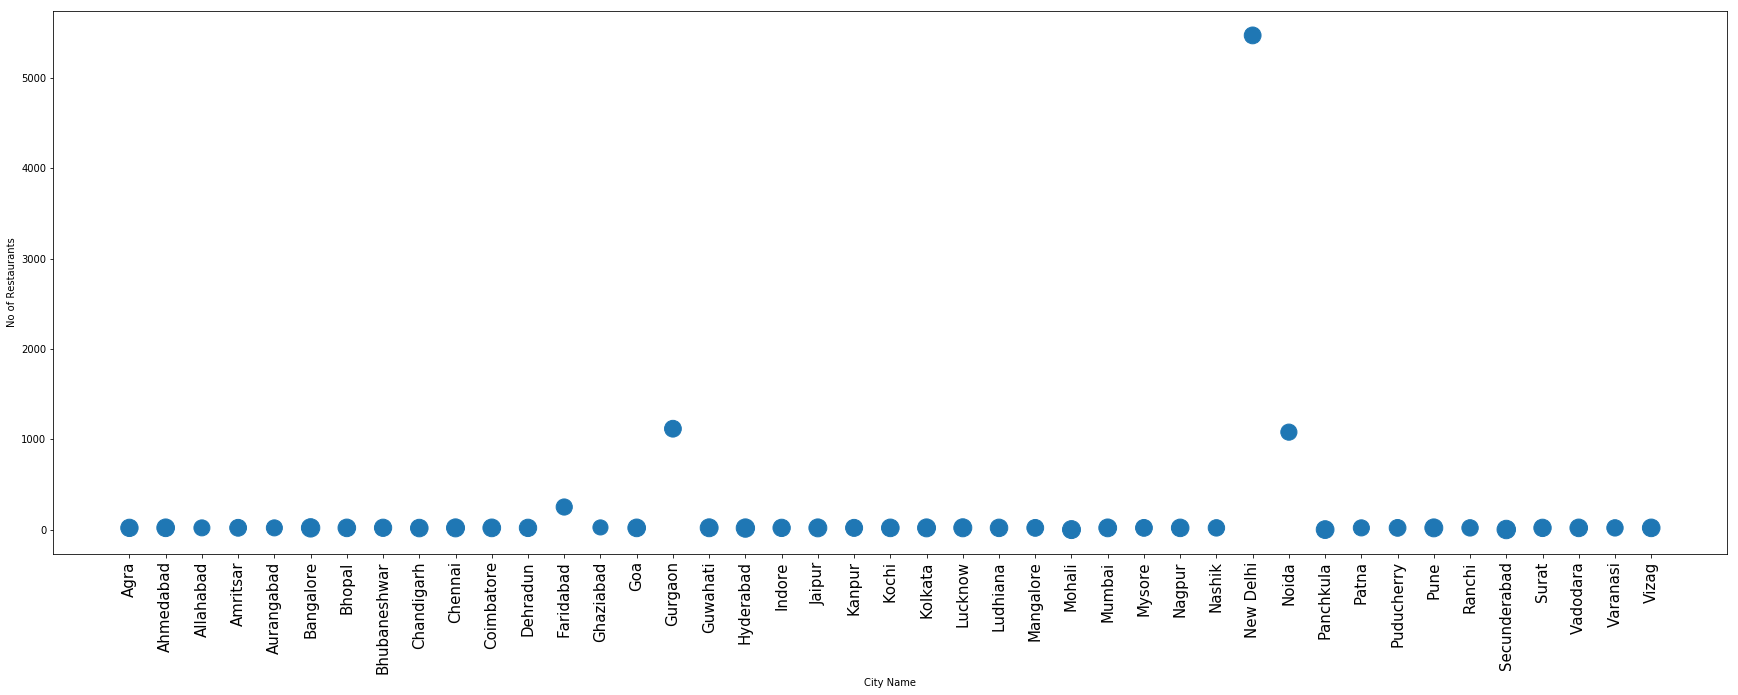

In [15]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating list of unique cities
city=list(set(df['city']))

#Dict City vs Ratings of restaurant
dict_rating_city={}
for i in city:
    df_temp=df[df['city']==i]
    rate=list(df_temp['aggregate_rating'])
    votes=list(df_temp['votes'])
    votes_rating=0
    total_votes=0
    for j in range(len(votes)):
        votes_rating+=votes[j]*rate[j]
    total_votes=sum(votes)
    if(total_votes!=0):
        weighted_rating=votes_rating/total_votes
    else:
        weighted_rating=0
    dict_rating_city[i]=dict_rating_city.get(i,0)+weighted_rating
    
#Now finding number of resturants in a City
dict_city_resCount={}
series_city_count=df['city'].value_counts()
dict_city_resCount=dict(series_city_count)

#Sorting items of dict_city_resCount and dict_rating_city
dict_city_resCount=sorted(dict_city_resCount.items())
dict_rating_city=sorted(dict_rating_city.items())

#Creating list x, y and z for plotting
x=[] #CityName
y=[] #Number Of resturants
z=[] #Weighted Rating
#From dict_city_rating has data of City VS Weighted Rating and dict_city_resCount has data of City Vs Number of Restaurants, generating list x,y and z
for j in range(len(dict_city_resCount)):
    x.append(dict_city_resCount[j][0])
    y.append(dict_city_resCount[j][1])
    z.append(dict_rating_city[j][1])
    
print('Bubble graph of number of Restaurants present in the cities of India and keeping the weighted restaurant rating of the city in a bubble.')
#Changing figure size of plot
plt.figure(figsize=(30,10))
#Changing angle and font size of text on x axis
plt.xticks(fontsize=15,rotation=90)
#Labelling x axis
plt.xlabel("City Name")
#Labelling y axis
plt.ylabel("No of Restaurants")
#Plotting scatter graph with cusine name on x axis, no. of restaurants on y axis and as weighed rating scalar
p=[i*75 for i in z]#Visual appearance
plt.scatter(x,y,s=p)
#Show plot
plt.show()

### Conclusion-Above extracted data shows the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.
## Justification
#### 1.In this code,Reading csv file zomato data and storing it in data.
#### 2.Creating df which stores a copy of data.
#### 3.Renaming column names are updated to lower case and spaces replaced with ‘_’.
#### 4.Now restricting dataframe df to country id 1 that is of India.
#### 5.Creating a list city of Unique cities .
#### 6.Using list city creating a dictionary dict_rating_city of city vs weighted ratings.
#### 7.Finding number of resturants in a City and store it in a dictionary dict_city_resCount.
#### 8.Sorting items of dict_city_resCount and dict_rating_city
#### 9.From dict_city_rating has data of City VS Weighted Rating and dict_city_resCount has data of City Vs Number of Restaurants, generating list x,y and z
#### 10.Creating p have each elements of z multiplied by 75(for visual appearance)
#### 11.Plotting bubble graph from x,p and y list ,p as scalar and x&y as x axis and y axis.